In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

import cv2
import matplotlib.pyplot as plt
from glob import glob

Using TensorFlow backend.


In [2]:
path = "D:\Kaggle\Kaggle Malaria Cell Images Dataset\cell_images"

Text(0.5, 1.0, 'Parasitized')

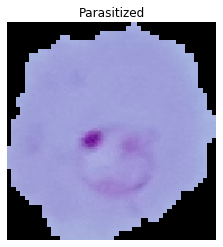

In [3]:
img = cv2.imread("cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_162.png")
plt.imshow(img)
plt.axis("off")
plt.title("Parasitized")

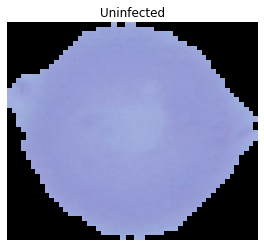

In [4]:
img = cv2.imread("cell_images/Uninfected/C100P61ThinF_IMG_20150918_144104_cell_128.png")
plt.imshow(img)
plt.axis("off")
plt.title("Uninfected")
plt.show()

In [5]:
image_data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    validation_split=0.3) 

In [6]:
train_data_gen = image_data_gen.flow_from_directory(
    directory=path,
    target_size = (50,50),
    color_mode='rgb',
    batch_size=32,
    class_mode = 'categorical',
    subset='training')

Found 19292 images belonging to 2 classes.


In [7]:
test_data_gen = image_data_gen.flow_from_directory(
    directory=path,
    target_size = (50,50),
    color_mode='rgb',
    batch_size=32,
    class_mode = 'categorical',
    subset='validation')

Found 8266 images belonging to 2 classes.


In [8]:
model = Sequential()

# feature extraction
model.add(Conv2D(32,(3,3),input_shape=(50, 50, 3))) # Convolution Layer -32=number of filter,
model.add(Activation("relu")) # Activation Function
model.add(MaxPooling2D()) # Pooling Layer (default size: (2,2))
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())

#fully connected
model.add(Flatten()) # Flatten
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5)) # dropout
model.add(Dense(2)) #output layer
model.add(Activation("softmax")) # softmax function

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 22, 22, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 11, 11, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 9, 9, 64)          18496     
__________

In [10]:
model.compile(loss = "categorical_crossentropy",
optimizer = "adam",
metrics = ["accuracy"])

In [11]:
hist = model.fit_generator(
    generator = train_data_gen,
    steps_per_epoch=50,
    epochs=100,
    validation_data = test_data_gen,
    validation_steps= 50)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
50/50 [==============================] - 8s 155ms/step - loss: 0.6967 - acc: 0.5206 - val_loss: 0.6937 - val_acc: 0.4931
Epoch 2/100
50/50 [==============================] - 4s 80ms/step - loss: 0.6778 - acc: 0.5587 - val_loss: 0.6302 - val_acc: 0.7450
Epoch 3/100
50/50 [==============================] - 4s 80ms/step - loss: 0.6926 - acc: 0.5481 - val_loss: 0.6755 - val_acc: 0.7044
Epoch 4/100
50/50 [==============================] - 4s 80ms/step - loss: 0.6753 - acc: 0.5675 - val_loss: 0.6181 - val_acc: 0.6837
Epoch 5/100
50/50 [==============================] - 4s 79ms/step - loss: 0.6420 - acc: 0.6338 - val_loss: 0.6354 - val_acc: 0.6637
Epoch 6/100
50/50 [==============================] - 4s 84ms/step - loss: 0.6129 - acc: 0.6650 - val_loss: 0.5729 - val_acc: 0.7776
Epoch 7/100
50/50 [==============================] - 4s 84ms/step - loss: 0.5497 - acc: 0.7388 - val_loss: 0.4726 - val_acc: 0.8319
Epoch 8/100
50/50 [========

Epoch 61/100
50/50 [==============================] - 4s 80ms/step - loss: 0.3351 - acc: 0.8630 - val_loss: 0.2986 - val_acc: 0.8738
Epoch 62/100
50/50 [==============================] - 4s 79ms/step - loss: 0.3247 - acc: 0.8700 - val_loss: 0.3261 - val_acc: 0.8750
Epoch 63/100
50/50 [==============================] - 4s 79ms/step - loss: 0.3211 - acc: 0.8806 - val_loss: 0.3314 - val_acc: 0.8574
Epoch 64/100
50/50 [==============================] - 4s 83ms/step - loss: 0.3480 - acc: 0.8638 - val_loss: 0.3071 - val_acc: 0.8656
Epoch 65/100
50/50 [==============================] - 4s 80ms/step - loss: 0.3390 - acc: 0.8669 - val_loss: 0.3055 - val_acc: 0.8706
Epoch 66/100
50/50 [==============================] - 4s 80ms/step - loss: 0.3564 - acc: 0.8581 - val_loss: 0.3197 - val_acc: 0.8800
Epoch 67/100
50/50 [==============================] - 4s 79ms/step - loss: 0.3068 - acc: 0.8781 - val_loss: 0.3054 - val_acc: 0.8694
Epoch 68/100
50/50 [==============================] - 4s 79ms/step - 

In [12]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


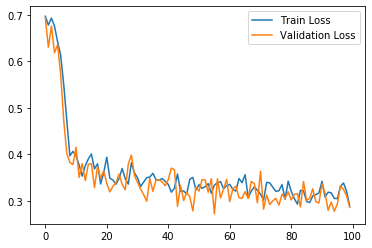

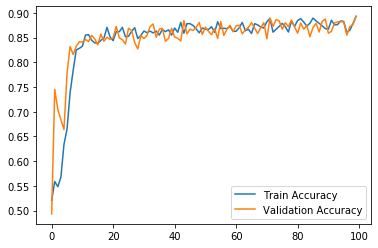

In [13]:
plt.plot(hist.history["loss"], label = "Train Loss")
plt.plot(hist.history["val_loss"], label = "Validation Loss")
plt.legend()
plt.show()

plt.plot(hist.history["acc"], label = "Train Accuracy")
plt.plot(hist.history["val_acc"], label = "Validation Accuracy")
plt.legend()
plt.show()